<a href="https://colab.research.google.com/github/lakshmipathirao9953/insight--X/blob/main/networkanalysis(insights_X).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kocherlakota Lakshmipathi Rao

In [53]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [54]:
messages = pd.read_csv("messages.csv")
employees = pd.read_csv("employees.csv")


In [55]:
messages.head(10)

sender  receiver            timestamp  message_length
0      79        48  2021-06-02 05:41:34              88
1      79        63  2021-06-02 05:42:15              72
2      79        58  2021-06-02 05:44:24              86
3      79        70  2021-06-02 05:49:07              26
4      79       109  2021-06-02 19:51:47              73
5      79        58  2021-06-03 01:12:11              37
6     144        99  2021-06-03 09:54:41              33
7     144       105  2021-06-03 09:57:02              80
8     144       121  2021-06-03 09:59:16              13
9     177        32  2021-06-04 07:50:33              32

In [56]:
employees.head(10)

id  department location  age
0   3  Operations       US   33
1   6       Sales       UK   50
2   8          IT   Brasil   54
3   9       Admin       UK   32
4  12  Operations   Brasil   51
5  19   Marketing       US   50
6  23       Sales   Brasil   39
7  26  Operations   France   32
8  27       Sales   France   58
9  29       Admin   France   33

In [57]:
send_act = messages.groupby('sender').size()
rec_act = messages.groupby('receiver').size()
dep_act = (send_act.add(rec_act, fill_value=0)).astype(int)
most_active_dep = dep_act.idxmax()
least_active_dep = dep_act.idxmin()


In [58]:


print(send_act)


print(rec_act)


print(dep_act)
print(most_active_dep)
print(least_active_dep)



sender
79       13
128     266
144     221
162      11
173      10
       ... 
1800      4
1802      2
1807     16
1879      4
1881     28
Length: 85, dtype: int64
receiver
3       11
6       10
8        1
9       22
12      12
        ..
1796     2
1801     4
1830     2
1839     8
1890     2
Length: 617, dtype: int64
3       11
6       10
8        1
9       22
12      12
        ..
1830     2
1839     8
1879     4
1881    28
1890     2
Length: 664, dtype: int64
605
8


In [59]:
emp_con = pd.concat([messages['sender'], messages['receiver']]).value_counts()
emp_high_con = emp_con.idxmax()


In [60]:
print(emp_high_con)

605


In [61]:
plt.figure(figsize=(100, 100))

for index, row in messages.iterrows():
    plt.plot([row['sender'], row['receiver']], [row['receiver'], row['receiver']], 'b-', linewidth=2)

plt.xlabel('Sender')
plt.ylabel('Receiver')
plt.title('Employee Communication Network')
plt.grid(True)
plt.show()


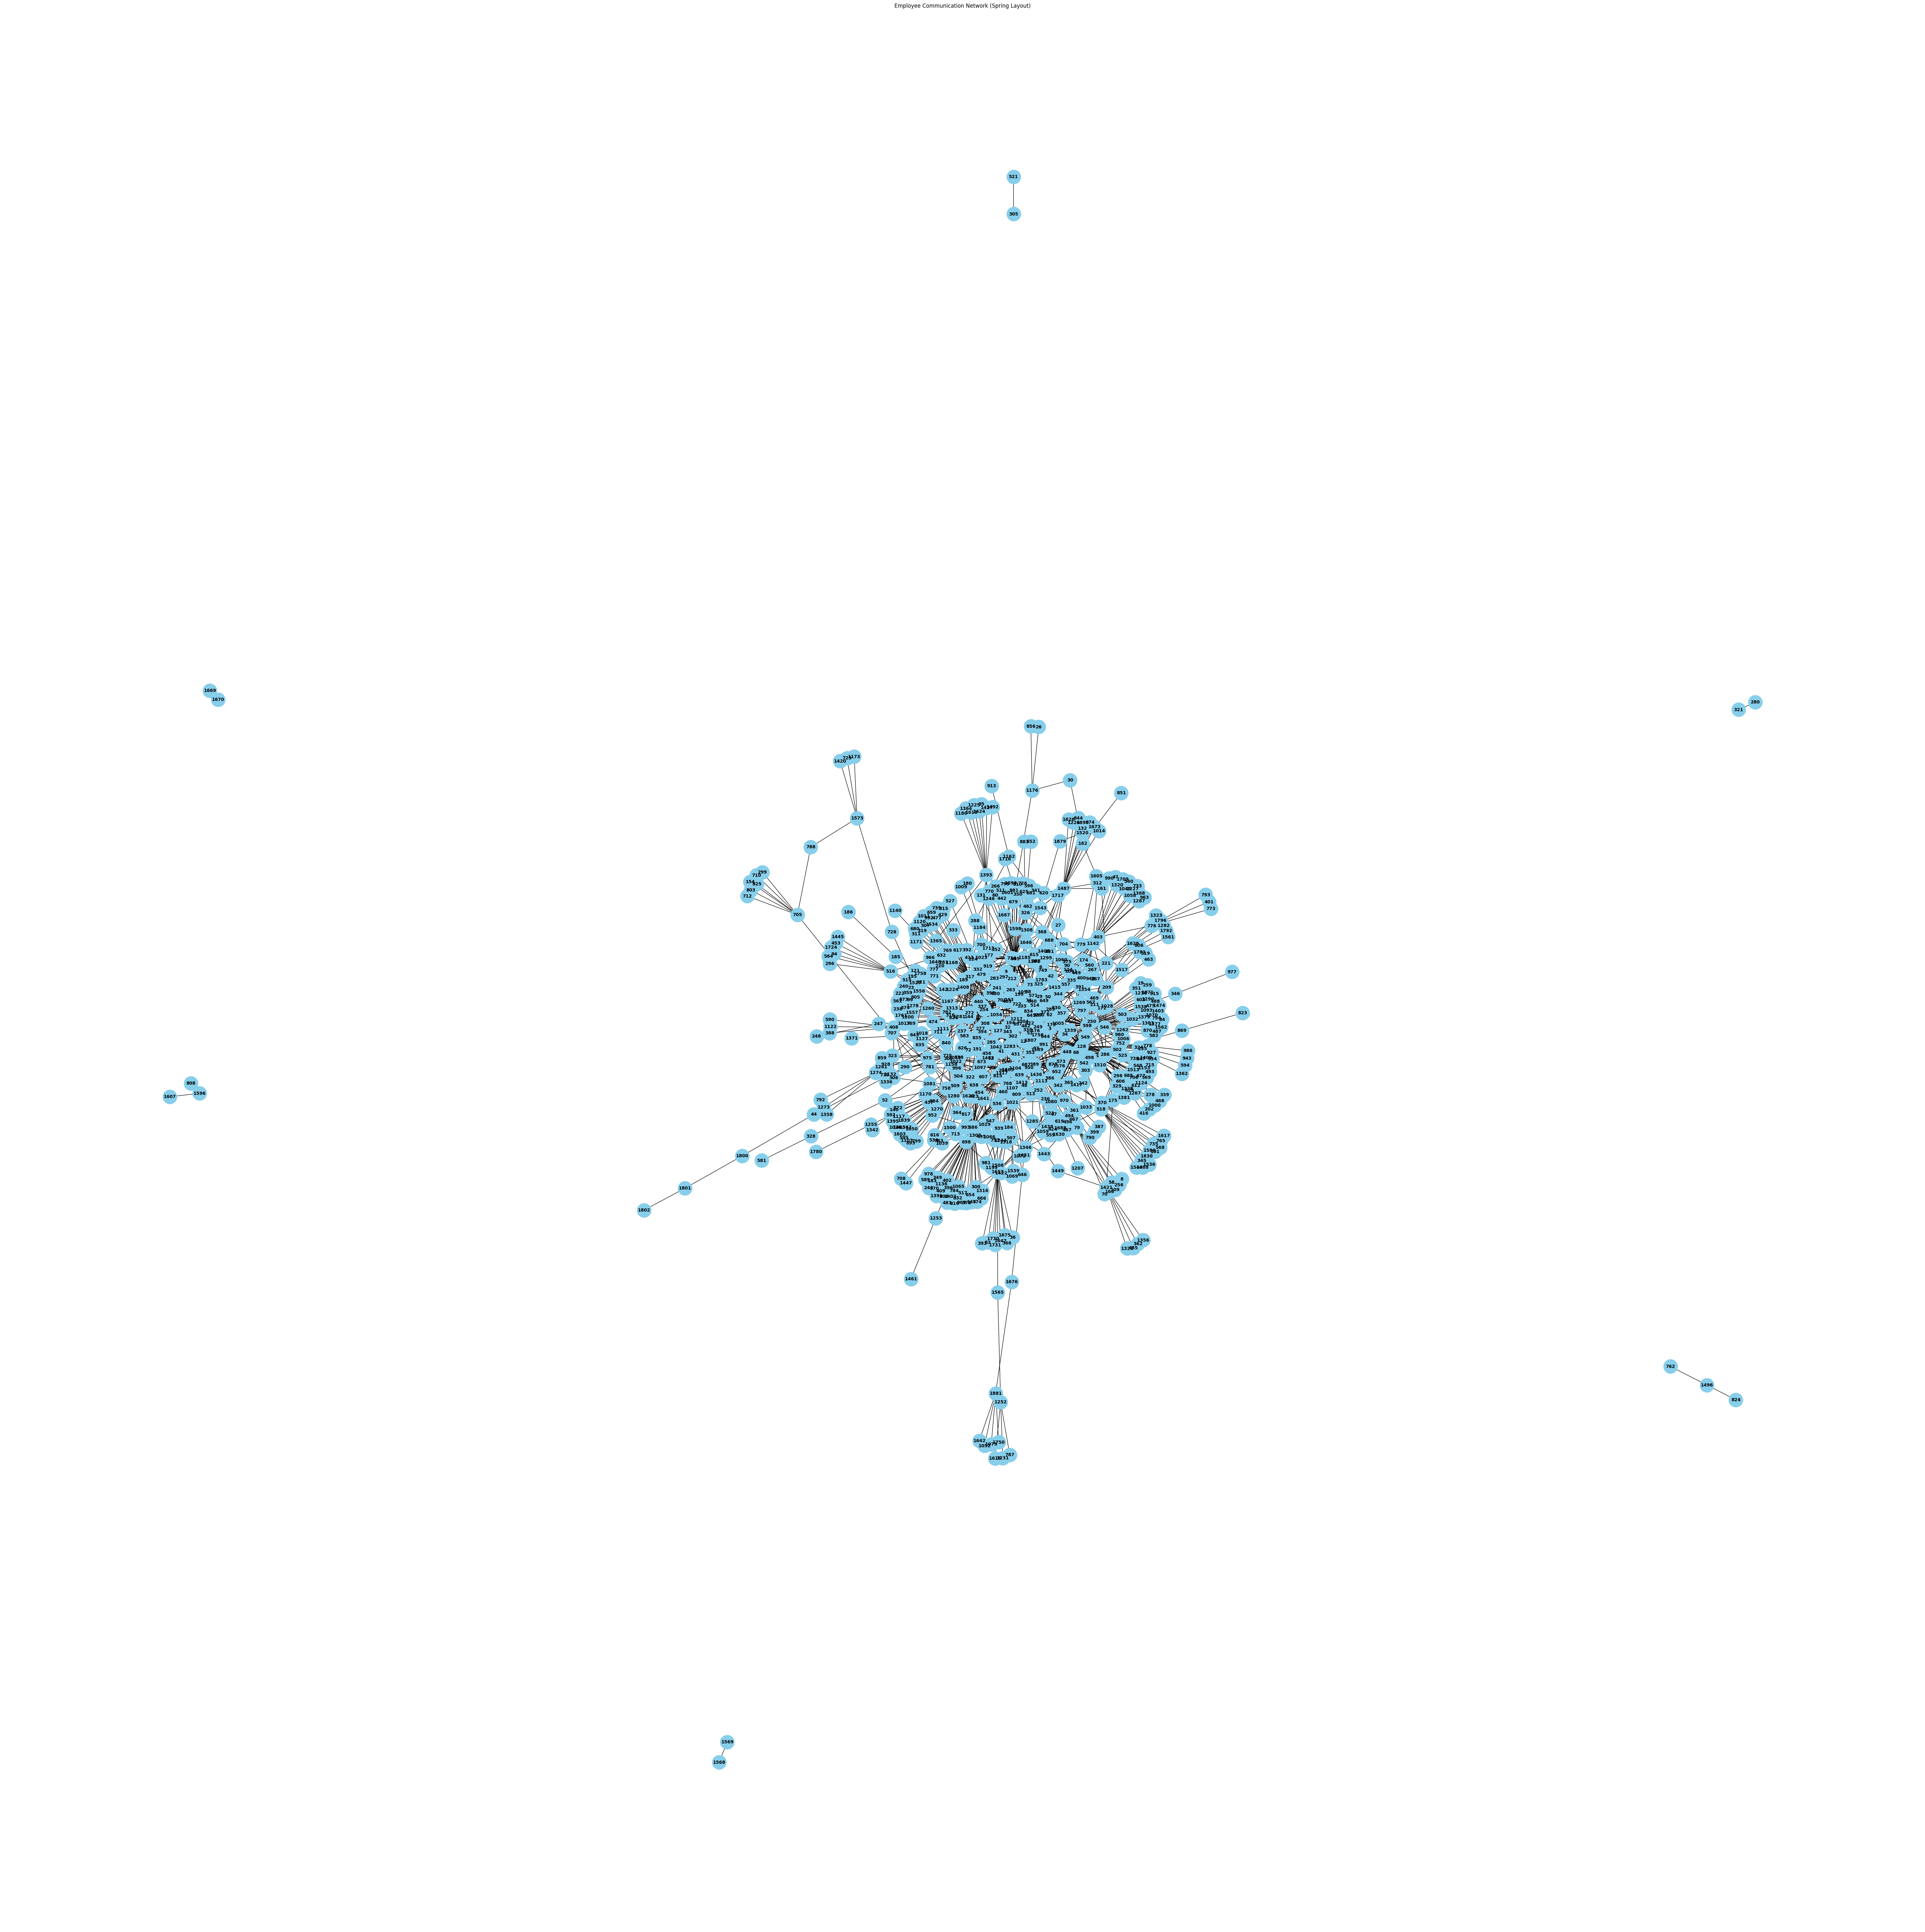

In [38]:
L = nx.from_pandas_edgelist(messages, 'sender', 'receiver')

pos = nx.spring_layout(L)

plt.figure(figsize=(60, 60))
nx.draw(G, pos=pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Employee Communication Network (Spring Layout)')
plt.show()


In [41]:
dep_influence = nx.degree_centrality(L)
emp_influence = nx.degree_centrality(L)


In [40]:
print(dep_influence)
print(emp_influence)

{79: 0.016591251885369532, 48: 0.0030165912518853697, 63: 0.006033182503770739, 58: 0.0015082956259426848, 70: 0.0015082956259426848, 109: 0.0015082956259426848, 144: 0.11463046757164405, 99: 0.0015082956259426848, 105: 0.010558069381598794, 121: 0.0015082956259426848, 177: 0.007541478129713424, 32: 0.016591251885369532, 180: 0.0015082956259426848, 186: 0.0015082956259426848, 185: 0.0030165912518853697, 221: 0.0196078431372549, 161: 0.004524886877828055, 237: 0.006033182503770739, 222: 0.0015082956259426848, 195: 0.0015082956259426848, 88: 0.004524886877828055, 238: 0.0015082956259426848, 240: 0.0015082956259426848, 23: 0.0015082956259426848, 241: 0.0030165912518853697, 247: 0.0030165912518853697, 248: 0.0015082956259426848, 260: 0.05279034690799397, 51: 0.004524886877828055, 267: 0.0015082956259426848, 127: 0.004524886877828055, 199: 0.0030165912518853697, 286: 0.01809954751131222, 3: 0.007541478129713424, 287: 0.0015082956259426848, 181: 0.0030165912518853697, 166: 0.0015082956259426

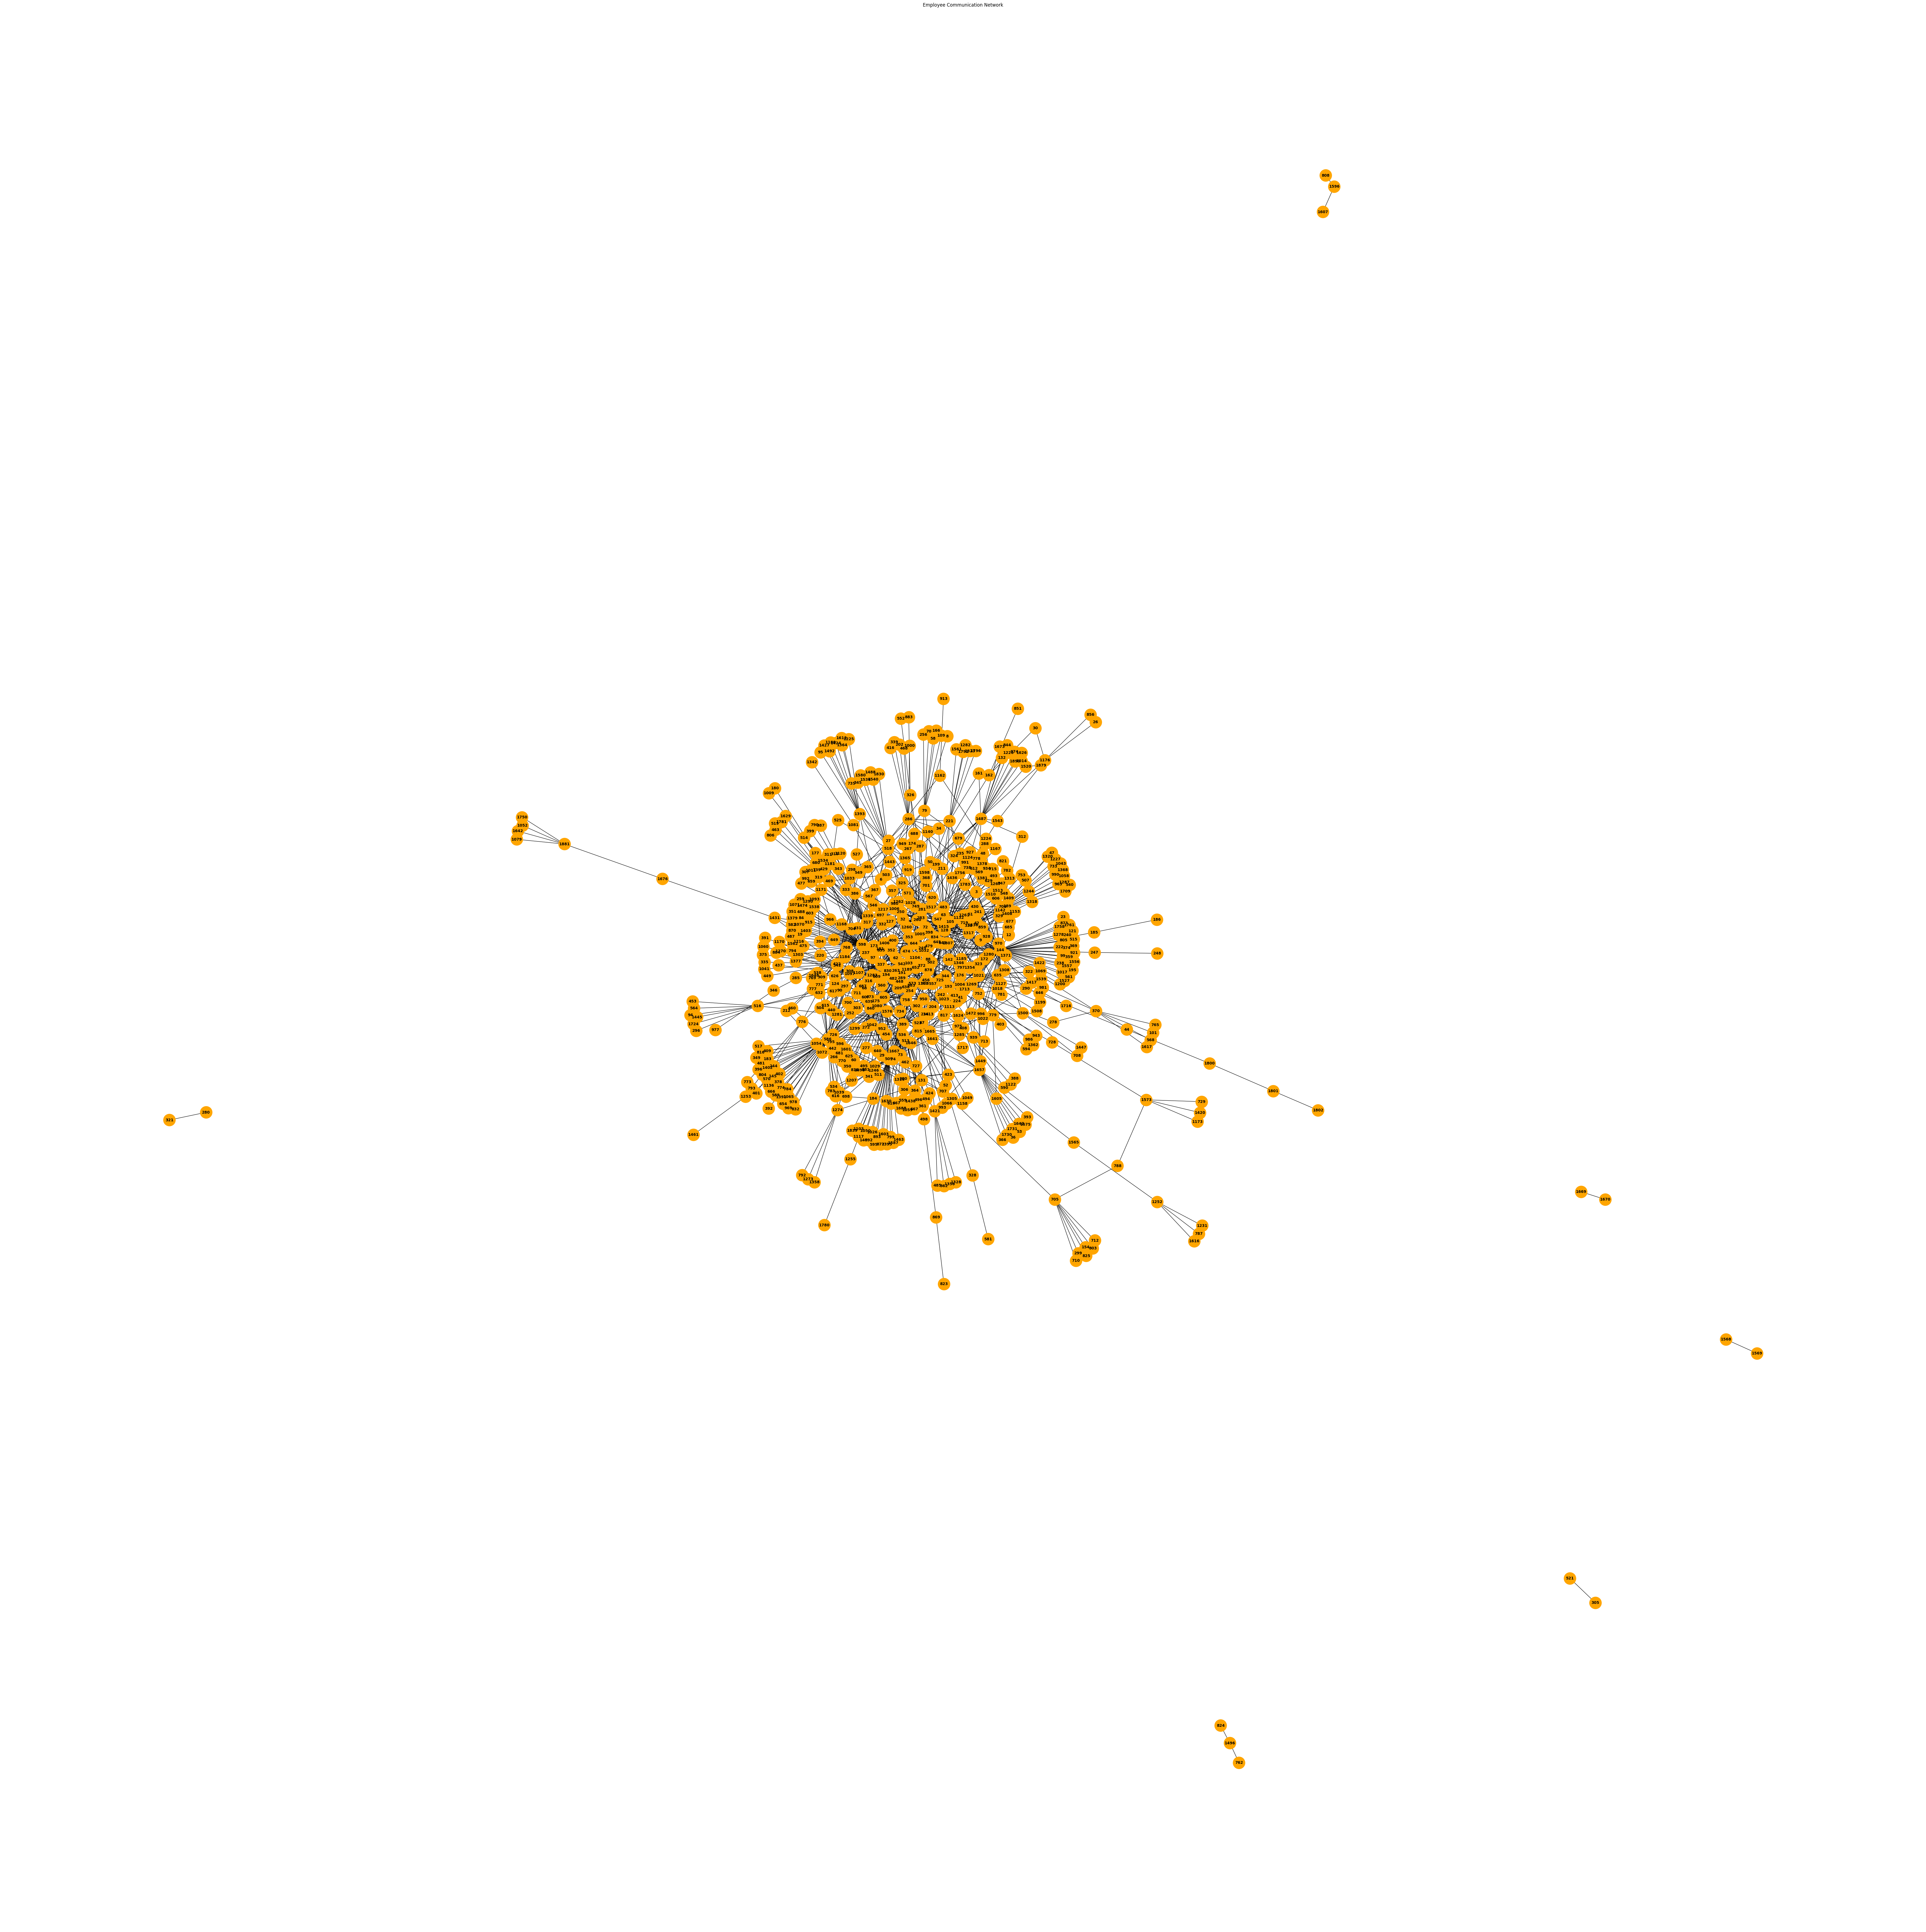

In [47]:
plt.figure(figsize=(70, 70))
nx.draw(L, with_labels=True, node_size=1000, node_color='orange', font_size=10, font_weight='bold')
plt.title('Employee Communication Network')
plt.show()


In [62]:
print("Most Active Department:", most_active_dep)
print("Least Active Department:", least_active_dep)
print("Employee with Highest Connections:", emp_high_con)
print("Most Influential Departments:")
for department, influence in sorted(dep_influence.items(), key=lambda x: x[1], reverse=True)[:3]:
    print("- Department:", department, "| Influence:", influence)
print("Most Influential Employees:")
for employee, influence in sorted(emp_influence.items(), key=lambda x: x[1], reverse=True)[:3]:
    print("- Employee:", employee, "| Influence:", influence)


Most Active Department: 605
Least Active Department: 8
Employee with Highest Connections: 605
Most Influential Departments:
- Department: 598 | Influence: 0.12217194570135748
- Department: 144 | Influence: 0.11463046757164405
- Department: 128 | Influence: 0.1085972850678733
Most Influential Employees:
- Employee: 598 | Influence: 0.12217194570135748
- Employee: 144 | Influence: 0.11463046757164405
- Employee: 128 | Influence: 0.1085972850678733


In [79]:
G = nx.from_pandas_edgelist(messages, 'sender', 'receiver')

department_centrality = {}
for index, row in employees.iterrows():
    employee_id = row['id']
    department = row['department']
    if department not in department_centrality:
        department_centrality[department] = 0
    department_centrality[department] += nx.degree(L, employee_id)

ranked_departments = sorted(department_centrality.items(), key=lambda x: x[1], reverse=True)


num_recommendations = 5
recommended_departments = [dept for dept, _ in ranked_departments[:num_recommendations]]

print("Recommendations for HR to enhance collaboration:")
for i, department in enumerate(recommended_departments, start=1):
    print(i,department)


Recommendations for HR to enhance collaboration:
1 Sales
2 Operations
3 Admin
4 IT
5 Engineering


In [75]:
print(department_centrality)

{'Operations': 611, 'Sales': 789, 'IT': 158, 'Admin': 450, 'Marketing': 70, 'Engineering': 150}


In [77]:
print(dep_influence)

{79: 0.016591251885369532, 48: 0.0030165912518853697, 63: 0.006033182503770739, 58: 0.0015082956259426848, 70: 0.0015082956259426848, 109: 0.0015082956259426848, 144: 0.11463046757164405, 99: 0.0015082956259426848, 105: 0.010558069381598794, 121: 0.0015082956259426848, 177: 0.007541478129713424, 32: 0.016591251885369532, 180: 0.0015082956259426848, 186: 0.0015082956259426848, 185: 0.0030165912518853697, 221: 0.0196078431372549, 161: 0.004524886877828055, 237: 0.006033182503770739, 222: 0.0015082956259426848, 195: 0.0015082956259426848, 88: 0.004524886877828055, 238: 0.0015082956259426848, 240: 0.0015082956259426848, 23: 0.0015082956259426848, 241: 0.0030165912518853697, 247: 0.0030165912518853697, 248: 0.0015082956259426848, 260: 0.05279034690799397, 51: 0.004524886877828055, 267: 0.0015082956259426848, 127: 0.004524886877828055, 199: 0.0030165912518853697, 286: 0.01809954751131222, 3: 0.007541478129713424, 287: 0.0015082956259426848, 181: 0.0030165912518853697, 166: 0.0015082956259426